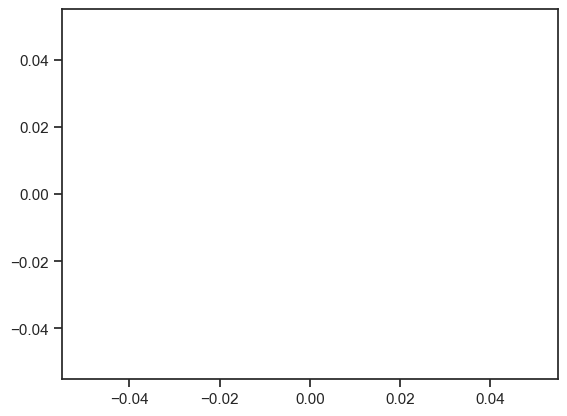

In [ ]:
#IMP for importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot()
plt.show()

In [ ]:
#Data Exploration
flights = sns.load_dataset("flights")
# flights.head(5)
# flights.info
# flights.isnull().sum()
flights.head(5)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


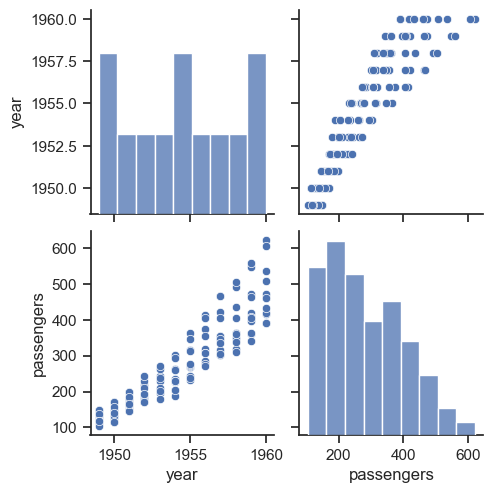

In [ ]:
#testing pairplot.shows a matrix of pairwise relationships between variables in a dataset.
sns.pairplot(flights)

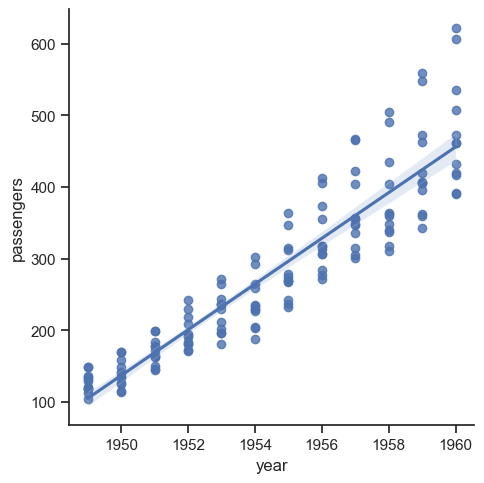

In [52]:
#testing implot
sns.set_theme(style='ticks')
sns.lmplot(data=flights,x="year",y="passengers")

In [66]:
titanic = sns.load_dataset("titanic")
titanic.head(5)
# titanic.dtypes
# # convert column to float
# titanic['sex'] = titanic['sex'].astype(float)
# titanic.dtypes
# null_rows = titanic['sex'].isna().sum()
# null_rows

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


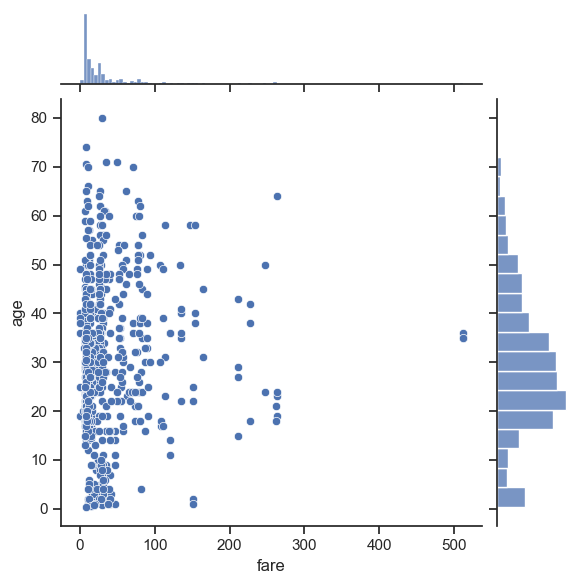

In [54]:
sns.jointplot(x='fare',y='age',data=titanic)

/var/folders/ms/kffv8scn23l62n_5h2kgw9sw0000gn/T/ipykernel_95578/616207242.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class',y='age',data=titanic,palette='rainbow')


<Axes: xlabel='class', ylabel='age'>

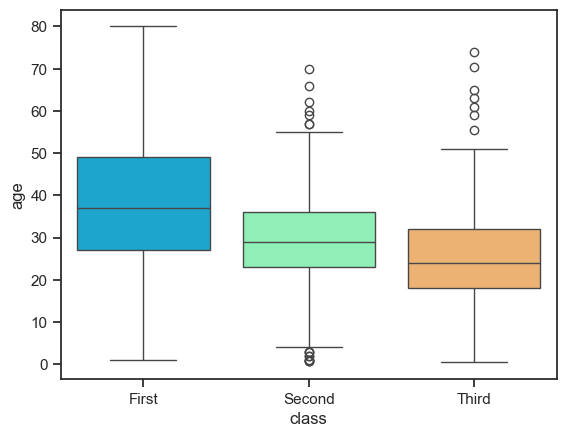

In [ ]:
#boxplot
sns.boxplot(x='class',y='age',data=titanic,palette='rainbow')

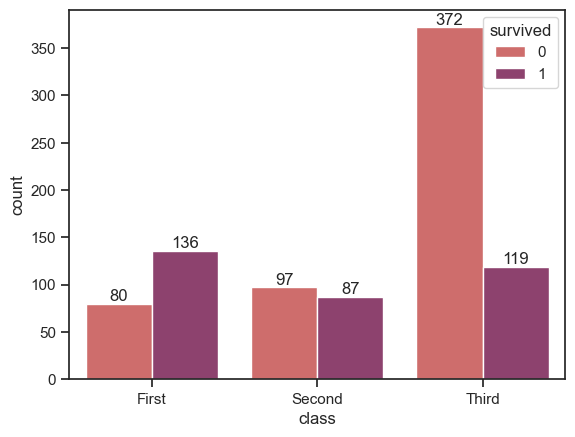

In [56]:
#countplot with values in plot
ax = sns.countplot(x='class',data=titanic, hue='survived',palette='flare')
for container in ax.containers:
    ax.bar_label(container)

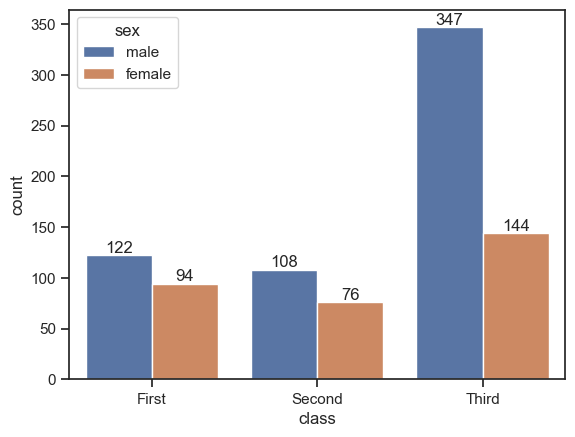

In [57]:
#countplot with values in plot
ax = sns.countplot(x='class',data=titanic, hue='sex')
for container in ax.containers:
    ax.bar_label(container)

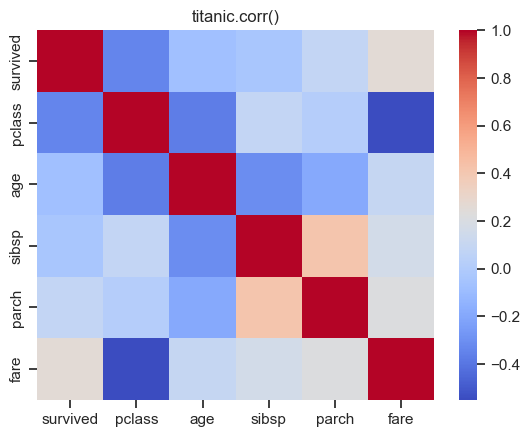

In [58]:
# Select only numeric columns
numeric_data = titanic.select_dtypes(include=['number'])

# Generate the correlation heatmap
sns.heatmap(numeric_data.corr(), cmap='coolwarm')
plt.title('titanic.corr()')
plt.show()

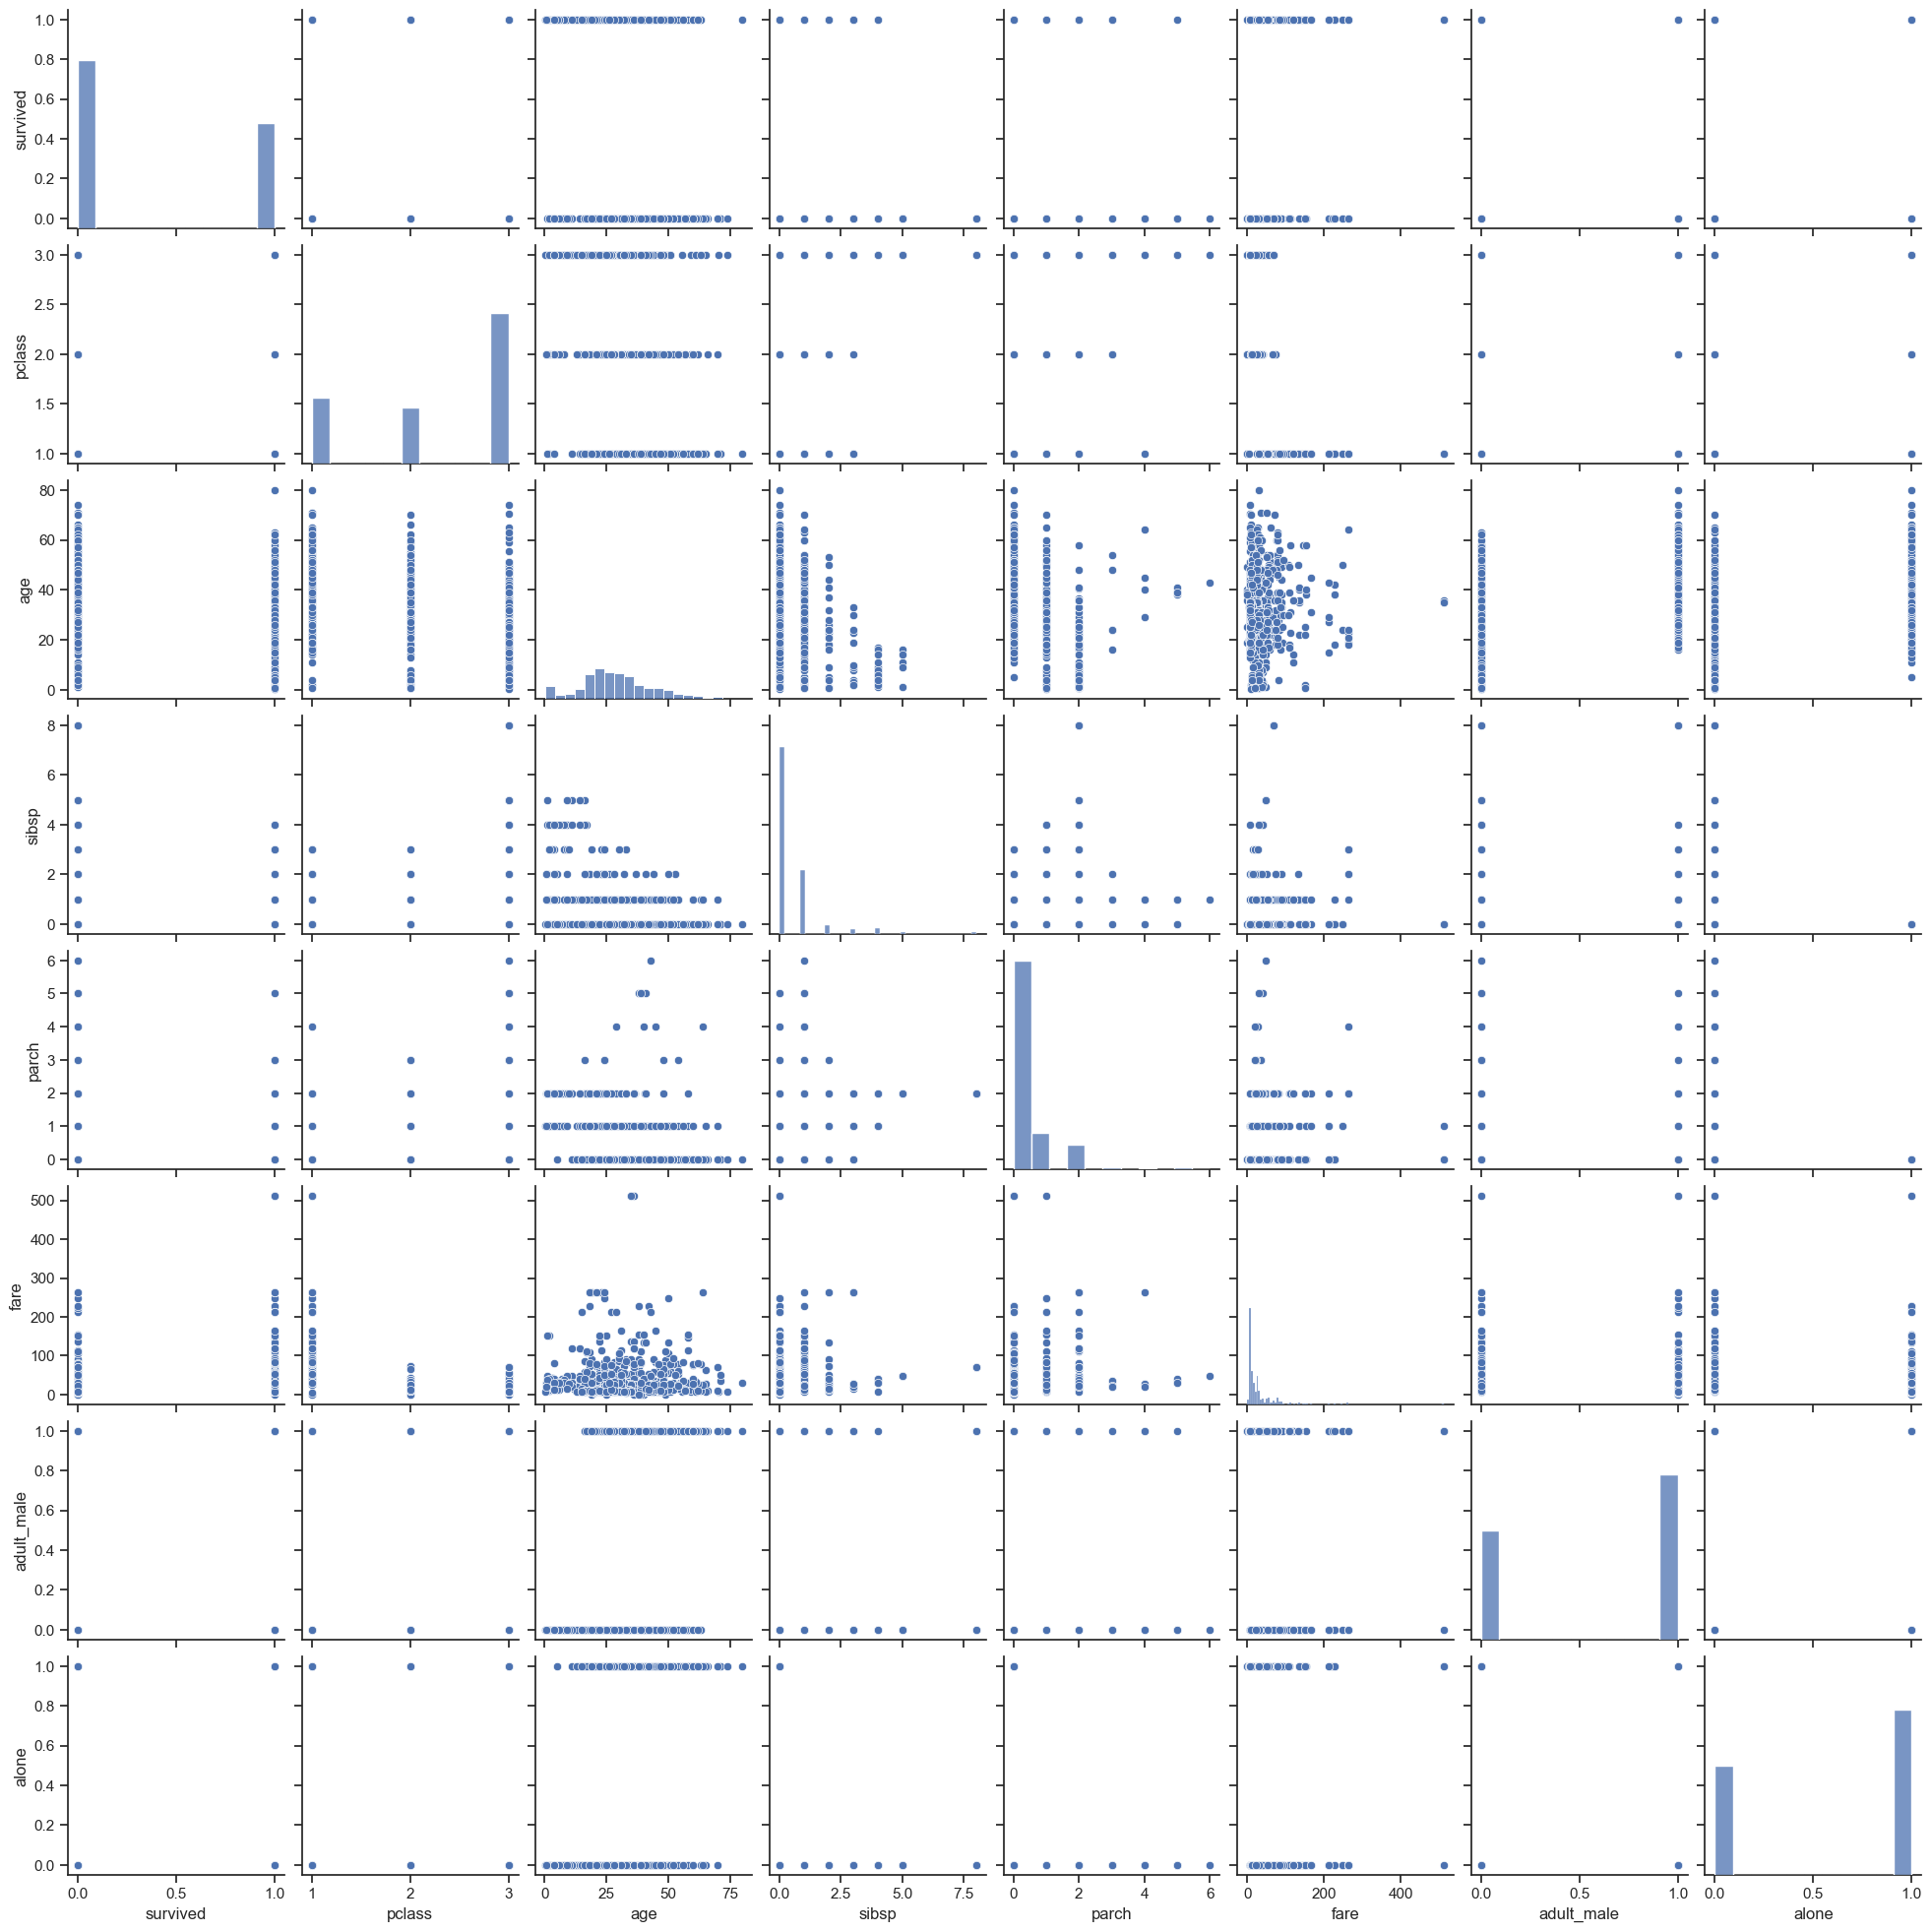

In [59]:
#testing pairplot
sns.pairplot(titanic)

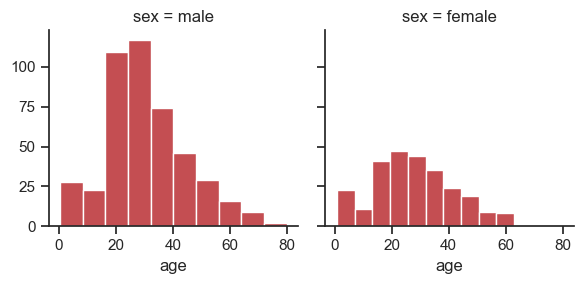

In [ ]:
d = {'color': ['r', 'b']}  # Dictionary specifying the colors ('r' for red, 'b' for blue) to be used for the different hue levels
fg = sns.FacetGrid(data=titanic, col='sex', hue_kws=d)  # Create a FacetGrid object with subplots for each unique value in the 'sex' column, customizing the appearance of hues using the dictionary.hue_kws: This argument is used to pass keyword arguments to the plotting function based on the levels of the hue variable.
fg.map(plt.hist, 'age')  # Apply the 'plt.hist' function to plot histograms of the 'age' column in each subplot

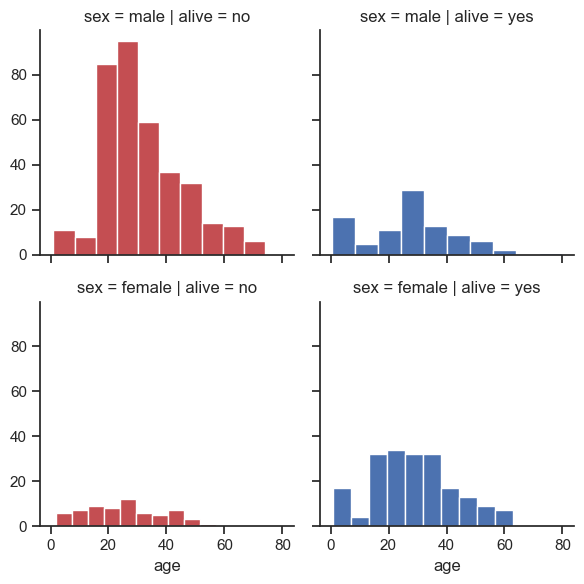

In [78]:
d = {'color': ['r', 'b']}
g = sns.FacetGrid(titanic, row='sex', col='alive', hue_kws=d, hue='alive')
g.map(plt.hist, 'age')

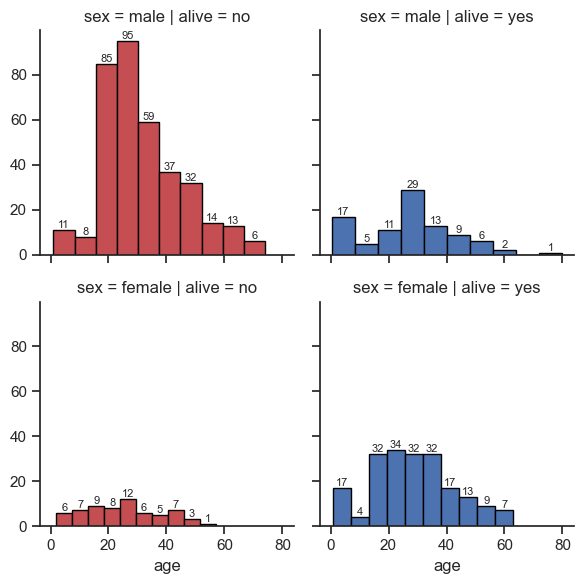

In [ ]:
    # Create the FacetGrid and plot
    d = {'color': ['r', 'b']}
    g = sns.FacetGrid(titanic, row='sex', col='alive', hue='alive', hue_kws=d)
    g.map(plt.hist, 'age', bins=10, edgecolor='black')

    # Add annotations to each bar
    for ax in g.axes.flat:  # Iterate through each subplot
        for patch in ax.patches:  # Iterate through each bar
            height = patch.get_height()
            if height > 0:  # Avoid adding text to empty bars
                ax.text(patch.get_x() + patch.get_width() / 2, height,  # Center the text
                        int(height), ha='center', va='bottom', fontsize=8)

plt.show()

kde=True
	•	KDE stands for Kernel Density Estimate.
	•	When kde=True, a smooth curve is overlaid on the histogram to represent the probability density function (PDF) of the data.
	•	The KDE provides a continuous estimate of the data distribution, making it easier to understand the general shape of the distribution.

Example Without KDE:
Only the histogram bars are shown, representing the frequency of data within bins.

Example With KDE:
The smooth curve overlays the histogram, providing a visual approximation of the distribution.
bins=10
	•	This parameter specifies the number of bins (intervals) in the histogram.
	•	Each bin represents a range of values, and the height of the bar shows how many data points fall within that range.
	•	A larger bins value creates narrower bins, showing more detailed data distribution. A smaller bins value creates wider bins, which may obscure finer details.

Default Behavior:
If you don’t specify bins, Seaborn automatically determines an appropriate bin size based on the data.

Example:
	•	bins=10: Divides the range of data into 10 equal-width intervals (bins).
	•	bins=20: Creates more bins, each covering a smaller range of values.
    Combined Usage (kde=True, bins=10)
	•	The histogram shows the frequency distribution with 10 bins.
	•	The KDE smooths the histogram to show the probability density function.
	•	This combination provides both a clear understanding of the raw data (via histogram) and its overall shape (via KDE).

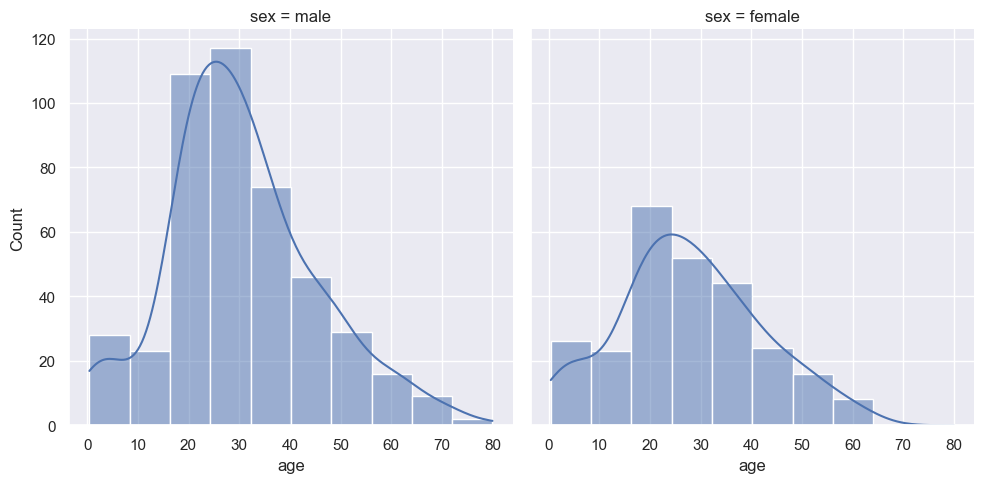

In [ ]:
# Example 1: Single Variable Distribution by sex
sns.displot(data=titanic, x="age", col="sex", kde=True, bins=10)
plt.show()

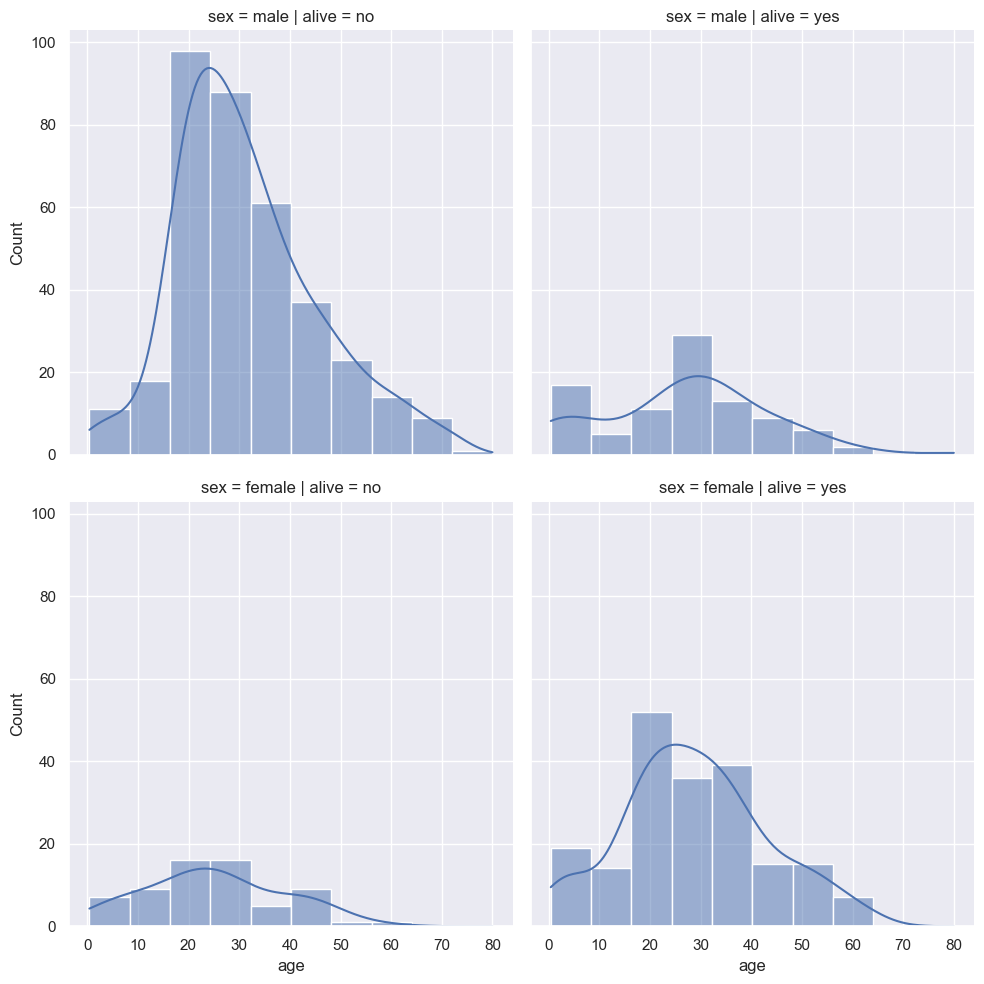

In [ ]:
# Example 2: Multiple Facets with row and col
sns.displot(data=titanic, x="age", row="sex", col="alive", kde=True, bins=10)
plt.show()

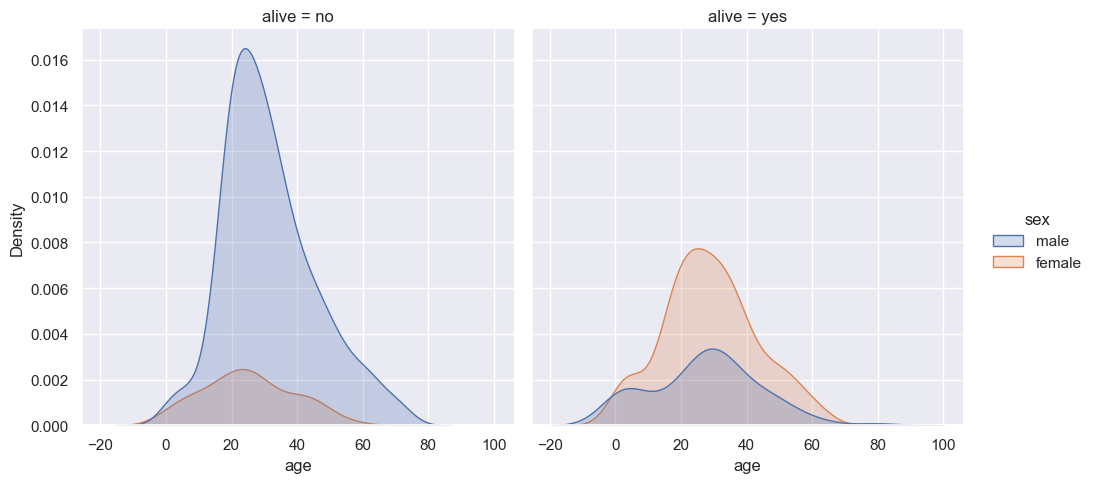

In [ ]:
#Example 3: Hue for Additional Grouping
	# •	hue="sex": Groups data by sex, coloring the KDE plots accordingly.
	# •	col="alive": Facets the columns by the alive column.
	# •	kind="kde": Switches to a kernel density estimate plot.
	# •	fill=True: Fills the area under the density curve.
sns.displot(data=titanic, x="age", hue="sex", col="alive", kind="kde", fill=True)
plt.show()

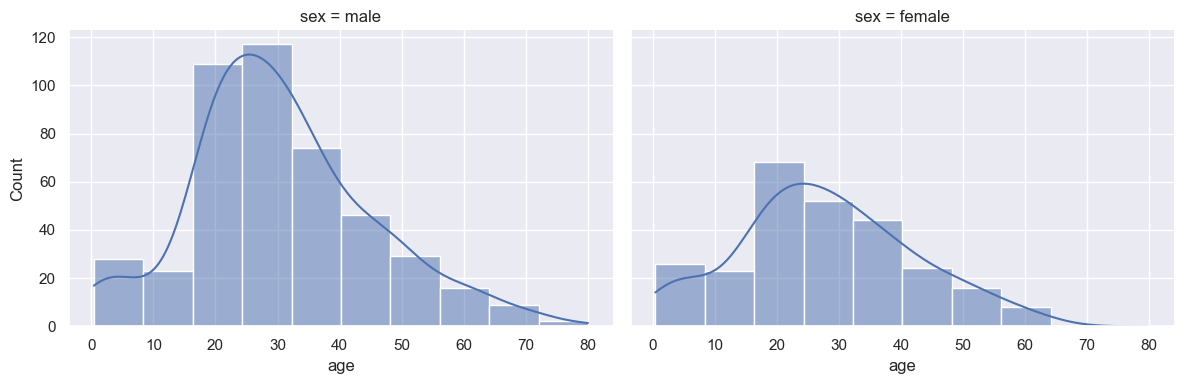

In [ ]:
# Example 5: Adjusted Styling and Aspect Ratio
# Explanation
# 	•	height=4: Adjusts the height of each facet.
# 	•	aspect=1.5: Changes the aspect ratio of each plot (width/height).
sns.displot(data=titanic, x="age", col="sex", kde=True, bins=10, height=4, aspect=1.5)
plt.show()